## <h1 align=center><font size = 10>Data Science Capstone Project</font></h1>

## Hello! Data Science

# Introduction

Traffic injuries happen all the time and it is imcreasingly becoming the main cause of death globally as the world has more and more vehicles. Many researches has conducted to analyze a range of factors, including weather conditions, special events, roadworks, traffic jams among others, in order to perform an accurate prediction of the severity of the accidents. People are always finding ways to aviod accidents or reduce the severity of the accidents, and knowing what and how factors influenced on the severity of accidents helps a lot. Governments would be interested in it, to efficiently allocate the resources for saving people, saving time and saving money. The target audience of the project is local government, police, rescue groups, road design teams, car insurance companies and last but not the least the drivers themselves. The model and its results are going to provide some key insights for the target audience to make impactful decisions in reducing the number of accidents and injuries in their localities. Data that contributes to determining severity of accident include addresstype, junctiontype, weather condition, Road condition and Light condition. This project aims to predict Severity of accident based on these metrics.  

# Data

The original link of dataset is provided below. It has around 200000 samples and about 60 attributes, which is provided by Seattle Department of Transportion. It is a well-rounded dataset, and includes how and when the accidents took place with number of people involved amd weather condition. Meta-data of the dataset also offered. To simplify the analyzing process, some key attributes are chosen and some features are dropped. Here,

SEVERITYVODE,
ADDRTYPE,
JUNCTIONTYPE,
WEATHER,
ROADCOND,
LIGHTCOND,
PERSONCOUNT,
PEDCOUNT,
PEDCYLCOUNT,
VEHCOUNT 

They are selected to be the key attributes. I believe these variables will also perform a good model for predicting the severity in car accident.

load the csv file





In [1]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [2]:
!wget -O collision.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
%matplotlib inline

df=pd.read_csv('collision.csv')
df.fillna('others',inplace=True)
df.drop(columns=['X', 'Y',],inplace=True)
df.drop(columns=['COLDETKEY', 'INCKEY','REPORTNO','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1', 'SEVERITYDESC', 
                 'INCDATE','INCDTTM',  'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 
                 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'OBJECTID', 'COLLISIONTYPE','STATUS'],inplace=True)


--2020-10-26 05:58:27--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘collision.csv’

collision.csv       100%[===================>]  70.49M  21.7MB/s    in 3.3s    

2020-10-26 05:58:31 (21.1 MB/s) - ‘collision.csv’ saved [73917638/73917638]



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,2,0,0,2,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,Block,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,Block,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,Block,3,0,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,Intersection,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight
...,...,...,...,...,...,...,...,...,...,...
194668,2,Block,3,0,0,2,Mid-Block (not related to intersection),Clear,Dry,Daylight
194669,1,Block,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Daylight
194670,2,Intersection,3,0,0,2,At Intersection (intersection related),Clear,Dry,Daylight
194671,2,Intersection,2,0,1,1,At Intersection (intersection related),Clear,Dry,Dusk


# Methodology

<AxesSubplot:xlabel='SEVERITYCODE', ylabel='count'>

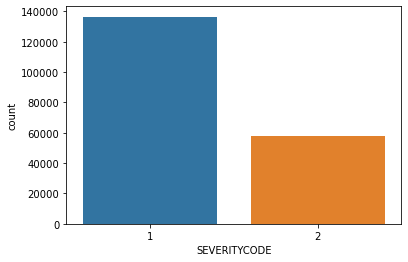

In [4]:
sns.countplot(df['SEVERITYCODE'],data=df)

### From the diagram above, we can find the severitycode has only two types, one stands for property damage and two stands for injury. Below, we will simply discuss the relation between some factors and severitycode, so called the severity of the accident.

### 1. Relationship between weather and seveitycode and accident, we will find more accidents occur in clear condition, that may because most of the time the weather condition should be clear. And more of the time, the accident is in the condition of one, which leads to property damage.

<AxesSubplot:xlabel='count', ylabel='WEATHER'>

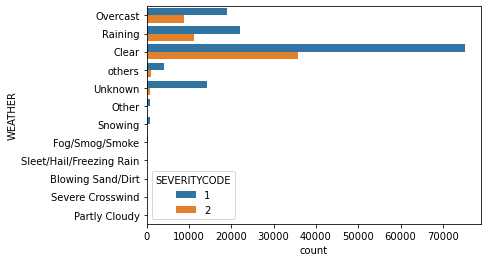

In [5]:
sns.countplot(y=df['WEATHER'],hue = 'SEVERITYCODE',data=df)

### 2. Relationship between VEHCOUNT, PERSONCOUNT based on SEVERITY. We can find when the personcount increases, the vehicle count also tends to increae. And more type'2' accidents occur when the vehicle count is high.

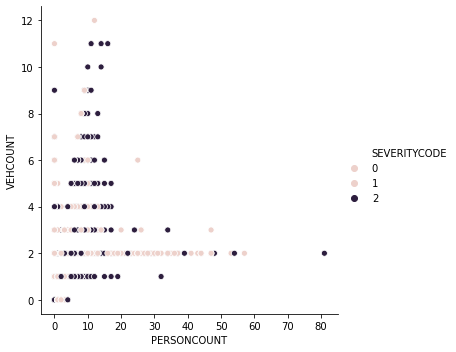

In [6]:
sns.relplot(x='PERSONCOUNT',y='VEHCOUNT',hue='SEVERITYCODE',data=df)

### 3. Relationship between LIGHTCOND and personcount and SEVERITY of Accidents. It is obvious that most accident take place when daylight and dark but with street lights on. It is also because this two condition covers most of time in our daily life. 

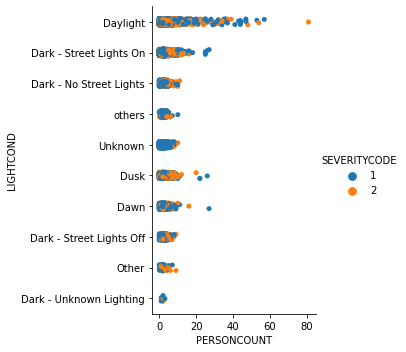

In [7]:
sns.catplot(x='PERSONCOUNT',y='LIGHTCOND',hue = 'SEVERITYCODE',data=df)

### 4. Convert Categorical features to numerical values

Before modelling, we have to do some preparation of the dataset, to convert te categorical variables to numeric values, for ADDRTYPE, JUNCTIONTYPE, WEATHER, ROADCOND, LIGHTCOND. 

The reason is that knn, decision tree, logistic models cannot treat with categorical variables. And moreover, we drop 'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT' these four attributes as to further simplify the whole prediction process.

In [8]:
from sklearn import preprocessing

addrtype = preprocessing.LabelEncoder()
addrtype.fit(df['ADDRTYPE'])
df['ADDRTYPE']=addrtype.transform(df['ADDRTYPE'])

jun = preprocessing.LabelEncoder()
jun.fit(df['JUNCTIONTYPE'])
df['JUNCTIONTYPE']=jun.transform(df['JUNCTIONTYPE'])

weathercon = preprocessing.LabelEncoder()
weathercon.fit(df['WEATHER'])
df['WEATHER']=weathercon.transform(df['WEATHER'])

roadcon = preprocessing.LabelEncoder()
roadcon.fit(df['ROADCOND'])
df['ROADCOND']=roadcon.transform(df['ROADCOND'])

lightcon = preprocessing.LabelEncoder()
lightcon.fit(df['LIGHTCOND'])
df['LIGHTCOND']=lightcon.transform(df['LIGHTCOND'])

df.drop(columns=['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'],inplace=True)
df

,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,2,1,4,8,5
1,1,1,4,6,8,2
2,1,1,4,4,0,5
3,1,1,4,1,0,5
4,2,2,1,6,8,5
...,...,...,...,...,...,...
194668,2,1,4,1,0,5
194669,1,1,4,6,8,5
194670,2,2,1,1,0,5
194671,2,2,1,1,0,6


In [9]:
X = df[['ADDRTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]

y = df['SEVERITYCODE'].values

### 5. Normalize Data

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 1.28668708, -1.19903701,  0.22981187,  1.39847224,  0.25900713],
       [-0.69338623,  0.73412368,  0.87758556,  1.39847224, -1.36653782],
       [-0.69338623,  0.73412368,  0.22981187, -0.73846749,  0.25900713],
       ...,
       [ 1.28668708, -1.19903701, -0.74184867, -0.73846749,  0.25900713],
       [ 1.28668708, -1.19903701, -0.74184867, -0.73846749,  0.80085545],
       [-0.69338623,  0.73412368, -0.74184867,  1.39847224,  0.25900713]])

# Predictive Modeling

Based on exploratory data analysis, I can see that the categorical variables have key impact in predicting severity in accidents hence I have selected these most important features to predict the severity of accidents in Seattle. Among all the features, the following features have the most influence in the accuracy of the predictions. “SEVERITYCODE” is the target variable. After standardizing the input feature, the data has been ready for building machine learning models. 

We will use the following models:

K-Nearest Neighbor (KNN)
KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

Decision Tree
A decision tree model gives us a layout of all possible outcomes so we can fully analyze the concequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.

Logistic Regression
Because our dataset only provides us with two severity code outcomes, our model will only predict one of those two classes. This makes our data binary, which is perfect to use with logistic regression.

### K Nearest Neighbor(KNN)



In [11]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 5) (155738,)
Test set: (38935, 5) (38935,)


In [ ]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier

# Best k
Ks=30
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test); 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

In [12]:
# Building the model again, using k= 25
from sklearn.neighbors import KNeighborsClassifier
k = 25
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [19]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.69
KNN F1-score: 0.60


### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
yhat = DT_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.70
DT F1-score: 0.58


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
yhat = LR_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
yhar_prob = LR_model.predict_proba(X_test)
yhar_prob

array([[0.79637941, 0.20362059],
       [0.55838386, 0.44161614],
       [0.74726717, 0.25273283],
       ...,
       [0.63655603, 0.36344397],
       [0.91059512, 0.08940488],
       [0.79637941, 0.20362059]])

In [22]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.70
LR F1-score: 0.59
LR LogLoss: 0.58


# Discussion

In the beginning of this notebook, we had categorical data that was of type 'object'. This is not a data type that we could have fed through an algoritim, so label encoding was used to created new classes that were of type int8; a numerical data type.

From the operation above, we have concluded the accuracy of each models, including K-Nearest Neighbour, Decision Tree and Logistic Regression. Although the first two are ideal for this project, logistic regression made most sense because of its binary nature. Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing different k, max depth and hyparameter C values helped to improve our accuracy to be the best possible.

And the result is shown here for reference:


KNN Jaccard index: 0.69
KNN F1-score: 0.60
    
DT Jaccard index: 0.70
DT F1-score: 0.58
    
LR Jaccard index: 0.70
LR F1-score: 0.59
LR LogLoss: 0.58

It can be suggested that the features like Weather, Road and Light conditions, addresstype, junctiontype have impact on severity in accidents, they can also help to predict the severity of the accident, that may results in injury or property damage.

# Conclusion

In this report, we analyze a dataset provided by Seattle Department of Transportion, trying to see a range of factors, including weather conditions, special events, roadworks, traffic jams among others, and in order to perform an accurate prediction of the severity of the accidents. 

We first Relationship between weather and seveitycode and accident, Relationship between VEHCOUNT, PERSONCOUNT based on SEVERITY,Relationship between LIGHTCOND and personcount and SEVERITY of Accidents. And finally choose ADDRTYPE, JUNCTIONTYPE, WEATHER, ROADCOND, LIGHTCOND these five factor to analyze whether they are relative to the severity of accident. By performing three models listed here: K-Nearest Neighbor (KNN) Decision Tree Logistic Regression. Obviously, The model and its results provide some key insights for the target audience to make impactful decisions in reducing the number of accidents and injuries in their localities. 

